Intelligent Data and Text Analytics Coursework 2

Download the data from: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences; choose one of the datasets, i.e., Amazon, imdb or Yelp.

1.	[30%] Preprocess the textual data to remove potential noise. Use, as a minimum, the following preprocessing methods: 1) removing punctuation, 2) removing numbers, 3) removing stop words, 4) changing the text to lower/upper case and 5) lemmatising. Describe in detail, with at least 3 examples, the changes to the text for each preprocessing method applied.
2.	[30%] Using the bag-of-words/terms representation, perform classification using 3 algorithms; present and discuss the results; compare the results of the 3 algorithms.
3.	[10%] Perform classification using a BERT-based model with fine-tuning and compare the results with the 3 algorithms from Task 2.
4.	[30%] Perform topic detection using 1 algorithm; present and discuss each topic, and assess the quality of the detected topics.

The marking scheme [in 100% breakup of marks] for each of the tasks is as follows: 20% - Display of results
40% - Analysis of results
20% - Use of tables and figures when reporting the results to facilitate understanding 10% - Organisation, language style and clarity
10% - The use of at least one method/algorithm not covered in the teaching sessions in addition to the number of methods/algorithms mentioned in the tasks; for example, for Task 1, 5 preprocessing methods are required; to get this 10% you need to include at least one more preprocessing method that was not covered in addition to the required 5.


In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

!pip install nltk

!pip install contractions

import nltk
import string
import random
import re
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction import text as text_learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics, naive_bayes
from sklearn import ensemble, linear_model

#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, jaccard_score,log_loss,auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

fig_size = plt.rcParams['figure.figsize']
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

In [94]:
pd.set_option('display.max_colwidth', None) # full text in text column

df = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)
df.head(10)

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
8,The fries were great too.,1
9,A great touch.,1


In [95]:
df.shape

(1000, 2)

In [96]:
col_names=['ReviewText','Sentiment']
df.columns=col_names

df.head()

,ReviewText,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [97]:
df['Sentiment'].value_counts() # Balanced labels

,count
Sentiment,
1,500
0,500


In [98]:
df.isnull().sum() # no null

,0
ReviewText,0
Sentiment,0


In [99]:
import string
punc=string.punctuation

punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## 1. [30%] Preprocess the textual data to remove potential noise. Use, as a minimum, the following preprocessing methods: 1) removing punctuation, 2) removing numbers, 3) removing stop words, 4) changing the text to lower/upper case and 5) lemmatising. Describe in detail, with at least 3 examples, the changes to the text for each preprocessing method applied.

In [100]:
# stop-words in english language
nltk.download('stopwords')

from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
print(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def stop_word(x):
    tokens=[]
    for token in x:
        if token not in STOP_WORDS:
            tokens.append(token)
    return tokens

In [102]:
import contractions

def process(text:str):
    text = contractions.fix(text) # Dealing with contractions in NLP, Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.
    text = text.translate(str.maketrans({key: f" {key} " for key in string.punctuation}))
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.lower()
    text = text.split()
    print(text)
    text = stop_word(text)
    print(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    print(lemmatized_words)
    text = " ".join(lemmatized_words)

    return text

In [103]:
nltk.download('wordnet')

df["processed_sentence"] = df.ReviewText.apply(process)
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['wow', 'loved', 'this', 'place']
['wow', 'loved', 'place']
['wow', 'loved', 'place']
['crust', 'is', 'not', 'good']
['crust', 'good']
['crust', 'good']
['not', 'tasty', 'and', 'the', 'texture', 'was', 'just', 'nasty']
['tasty', 'texture', 'nasty']
['tasty', 'texture', 'nasty']
['stopped', 'by', 'during', 'the', 'late', 'may', 'bank', 'holiday', 'off', 'rick', 'steve', 'recommendation', 'and', 'loved', 'it']
['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved']
['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved']
['the', 'selection', 'on', 'the', 'menu', 'was', 'great', 'and', 'so', 'were', 'the', 'prices']
['selection', 'menu', 'great', 'prices']
['selection', 'menu', 'great', 'price']
['now', 'i', 'am', 'getting', 'angry', 'and', 'i', 'want', 'my', 'damn', 'pho']
['getting', 'angry', 'want', 'damn', 'pho']
['getting', 'angry', 'want', 'damn', 'pho']
['honeslty', 'it', 'did', 'not', 'taste', 'that', 'fresh']
['ho

,ReviewText,Sentiment,processed_sentence
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,stopped late may bank holiday rick steve recommendation loved
4,The selection on the menu was great and so were the prices.,1,selection menu great price
...,...,...,...
995,I think food should have flavor and texture and both were lacking.,0,think food flavor texture lacking
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go back.,0,overall impressed would go back
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0,whole experience underwhelming think go ninja sushi next time


In [104]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance

df = df.sample(frac=1, random_state=1)
df.reset_index(drop=True, inplace=True)

df.head()

,ReviewText,Sentiment,processed_sentence
0,My gyro was basically lettuce only.,0,gyro basically lettuce
1,It kept getting worse and worse so now I'm officially done.,0,kept getting worse worse officially done
2,I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.,0,far sushi connoisseur definitely tell difference good food bad food certainly bad food
3,"The staff are great, the ambiance is great.",1,staff great ambiance great
4,By this time our side of the restaurant was almost empty so there was no excuse.,0,time side restaurant almost empty excuse


## 2. [30%] Using the bag-of-words/terms representation, perform classification using 3 algorithms; present and discuss the results; compare the results of the 3 algorithms

In [105]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df[["processed_sentence", "Sentiment"]], stratify=df.Sentiment, test_size=0.2)

In [106]:
df_train

,processed_sentence,Sentiment
819,best luck rude non customer service focused new management,0
468,ordered voodoo pasta first time would really excellent pasta since going gluten free several year ago,1
208,spaghetti nothing special whatsoever,0
217,atmosphere modern hip maintaining touch coziness,1
172,delicious absolutely back,1
...,...,...
778,join club get awesome offer via email,1
336,drink took close minute come one point,0
719,pizza tasted old super chewy good way,0
824,also ordered spinach avocado salad ingredient sad dressing literally zero taste,0


In [107]:
df_test

,processed_sentence,Sentiment
203,burger good beef cooked right,1
15,management rude,0
507,perfect someone like beer ice cold case even colder,1
801,mistake,0
11,husband ate lunch disappointed food service,0
...,...,...
424,problem charge sandwich bigger subway sub offer better amount vegetable,0
857,bug never showed would given sure side wall bug climbing kitchen,0
456,service quick even go order like like,1
126,get inside impressed place,1


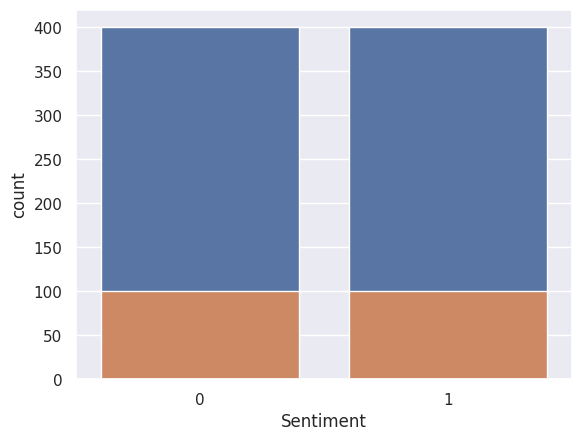

In [108]:
##fig, ax = plt.subplots(1, 2, figsize=(fig_size[0] * 2, fig_size[1] * 1))
sns.countplot(x ='Sentiment', data = df_train)
sns.countplot(x ='Sentiment', data = df_test)
# Show the plot
plt.show()

<Axes: xlabel='Sentiment'>

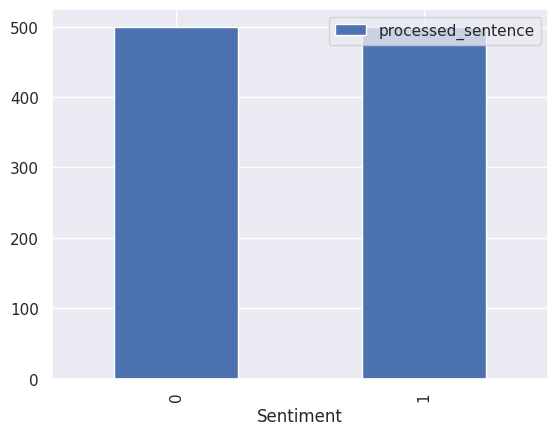

In [109]:
# The distribution of sentiments
df[["processed_sentence", "Sentiment"]].groupby('Sentiment').count().plot(kind='bar')

<Axes: >

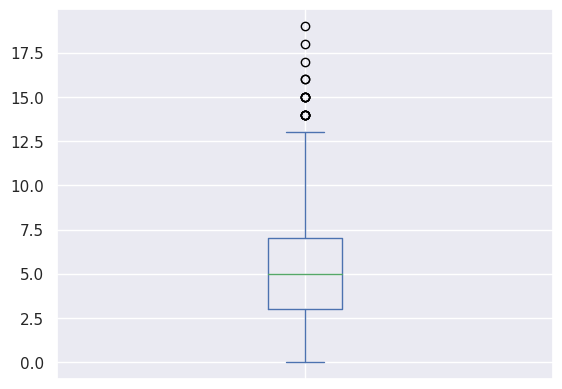

In [110]:
# Calculate review lengths
review_len = pd.Series([len(review.split()) for review in df['processed_sentence']])

# The distribution of review text lengths
review_len.plot(kind='box')

<Axes: ylabel='Count'>

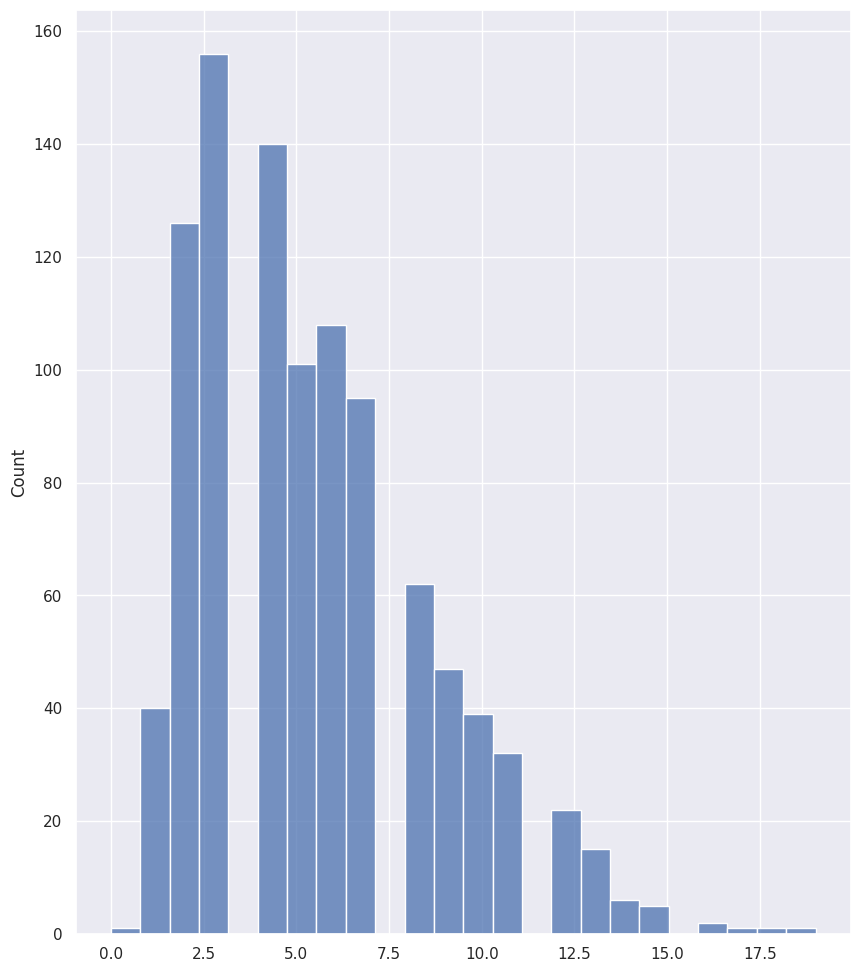

In [111]:
# Now, let us visualize how long our sentences are in the training data.
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

plt.figure(figsize = (10,12))
sns.histplot(review_len)

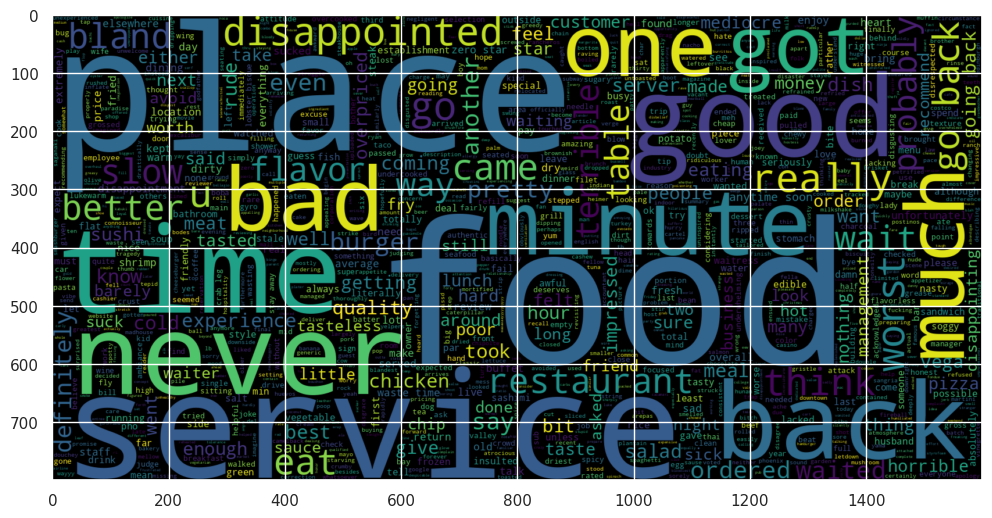

In [112]:
# WORDCLOUD FOR NEGATIVE TEXT (LABEL - 0)

from wordcloud import WordCloud
plt.figure(figsize = (12,12)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 0].processed_sentence))
plt.imshow(wc , interpolation = 'bilinear')

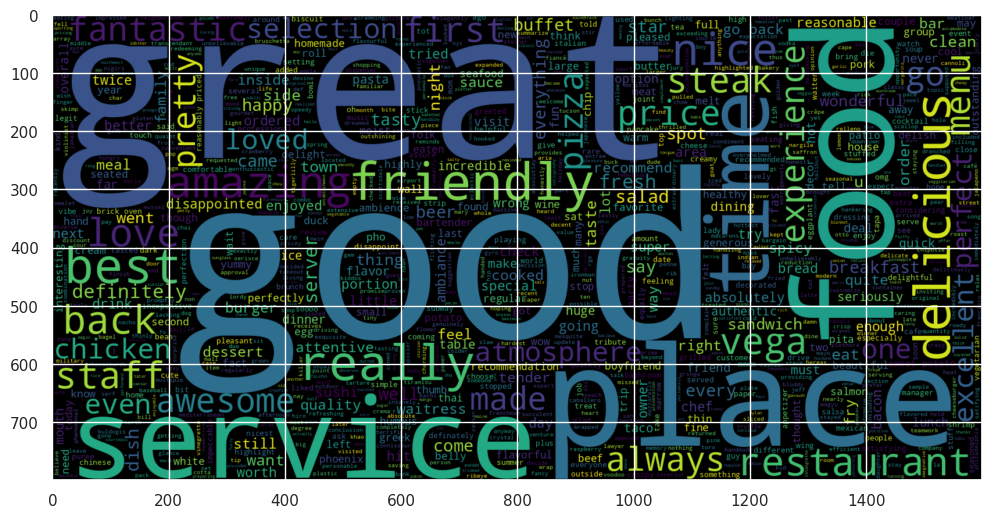

In [113]:
# WORDCLOUD FOR NEGATIVE TEXT (LABEL - 1)

from wordcloud import WordCloud
plt.figure(figsize = (12,12)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 1].processed_sentence))
plt.imshow(wc , interpolation = 'bilinear')

In [114]:
####################################################################################
def visualizing_confusion_matrix_using_heatmap(model):
    #https://www.datacamp.com/tutorial/understanding-logistic-regression-python
	  # Visualizing confusion matrix using a heatmap

    y_test = df_test.Sentiment.values
    y_pred = model.predict(df_test.processed_sentence.values)
    #y_pred_proba = model.predict_proba(df_test.processed_sentence.values)[:, 1]

    print ('Accuracy:', accuracy_score(y_test, y_pred))
    print ('F1 score:', f1_score(y_test, y_pred, average='weighted'))
    print ('Recall:', recall_score(y_test, y_pred, average='weighted'))
    print ('Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('Jaccard_ Score: ', (jaccard_score(y_test, y_pred, average='micro')))

    #fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_proba)
    #auc_score = metrics.auc(fpr, tpr)
    #print(f"AUC: {auc_score:.3f}")

    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print ('\n confusion matrix:\n', conf_matrix)

    classifi_report = metrics.classification_report(y_test, y_pred)
    print ('\n clasification report:\n', classifi_report)

    plt.figure(figsize=(9,9))
	# create heatmap
    sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    #ax.xaxis.set_label_position("top")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
    plt.title(title, size = 15);
    plt.show()
###################################################################################

# logistic_regression

In [115]:
tfpipe = Pipeline([
    ('tfidf', text_learn.TfidfVectorizer()),
    ('logistic_regression', linear_model.LogisticRegression(max_iter=250))
])

param_grid = {
    'logistic_regression__C': np.logspace(-2, 3, base=2, num=15).tolist() + np.logspace(-2, 3, base=10, num=15).tolist(),
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2), (1, 3)]
}

model_grid = GridSearchCV(tfpipe, param_grid)
model_grid.fit(df_train.processed_sentence, df_train.Sentiment)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('logistic_regression',
                                        LogisticRegression(max_iter=250))]),
             param_grid={'logistic_regression__C': [0.25, 0.32022167244106814,
                                                    0.410167678003819,
                                                    0.5253783193266097,
                                                    0.6729500963161781,
                                                    0.8619728212469778,
                                                    1.1040895136738123,
                                                    1.4142135623730951,
                                                    1.8114473285278134,
                                                    2.320258772320326,
                                                    2.971988578...
                                                    3.806780612042479,
                                                    4.8760546168179015,
                                                    6.245673457245682, 8.0,
                                                    0.01, 0.022758459260747887,
                                                    0.05179474679231213,
                                                    0.11787686347935872,
                                                    0.2682695795279726,
                                                    0.6105402296585329,
                                                    1.3894954943731375,
                                                    3.1622776601683795,
                                                    7.196856730011521,
                                                    16.378937069540648,
                                                    37.27593720314942,
                                                    84.83428982440725,
                                                    193.06977288832496,
                                                    439.3970560760795, 1000.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2),
                                                (1, 3)]})

In [116]:
best_model_tf = model_grid.best_estimator_
model_grid.best_params_

{'logistic_regression__C': 0.8619728212469778, 'tfidf__ngram_range': (1, 3)}

Accuracy: 0.765
F1 score: 0.7648530331457161
Recall: 0.765
Precision: 0.7656641604010025
Jaccard_ Score:  0.6194331983805668

 confusion matrix:
 [[79 21]
 [26 74]]

 clasification report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.78      0.74      0.76       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



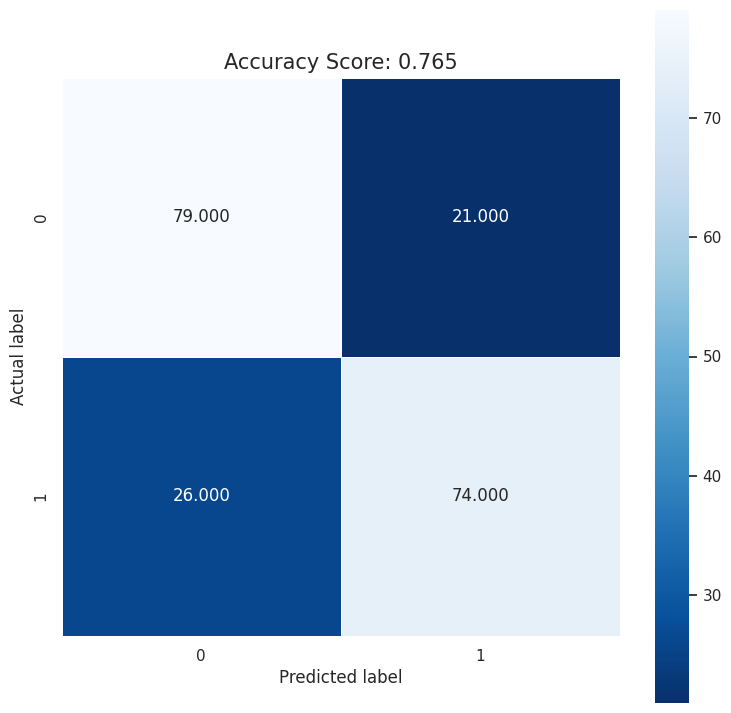

In [117]:
visualizing_confusion_matrix_using_heatmap(best_model_tf)

In [118]:
pipe = Pipeline([
    ('bow', text_learn.CountVectorizer()),
    ('logistic_regression', linear_model.LogisticRegression(max_iter=250))
])

param_grid = {
    'logistic_regression__C': np.logspace(-2, 3, base=2, num=15).tolist() + np.logspace(-2, 3, base=10, num=15).tolist(),
    'bow__ngram_range': [(1, 1), (1, 2), (2, 2), (1, 3)]
}

model_grid = GridSearchCV(pipe, param_grid)
model_grid.fit(df_train.processed_sentence, df_train.Sentiment)

GridSearchCV(estimator=Pipeline(steps=[('bow', CountVectorizer()),
                                       ('logistic_regression',
                                        LogisticRegression(max_iter=250))]),
             param_grid={'bow__ngram_range': [(1, 1), (1, 2), (2, 2), (1, 3)],
                         'logistic_regression__C': [0.25, 0.32022167244106814,
                                                    0.410167678003819,
                                                    0.5253783193266097,
                                                    0.6729500963161781,
                                                    0.8619728212469778,
                                                    1.1040895136738123,
                                                    1.4142135623730951,
                                                    1.811...
                                                    2.320258772320326,
                                                    2.9719885782738973,
                                                    3.806780612042479,
                                                    4.8760546168179015,
                                                    6.245673457245682, 8.0,
                                                    0.01, 0.022758459260747887,
                                                    0.05179474679231213,
                                                    0.11787686347935872,
                                                    0.2682695795279726,
                                                    0.6105402296585329,
                                                    1.3894954943731375,
                                                    3.1622776601683795,
                                                    7.196856730011521,
                                                    16.378937069540648,
                                                    37.27593720314942,
                                                    84.83428982440725,
                                                    193.06977288832496,
                                                    439.3970560760795,
                                                    1000.0]})

In [119]:
best_model = model_grid.best_estimator_
model_grid.best_params_

{'bow__ngram_range': (1, 3), 'logistic_regression__C': 0.6729500963161781}

Accuracy: 0.77
F1 score: 0.7676767676767676
Recall: 0.77
Precision: 0.78125
Jaccard_ Score:  0.6260162601626016

 confusion matrix:
 [[87 13]
 [33 67]]

 clasification report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.84      0.67      0.74       100

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



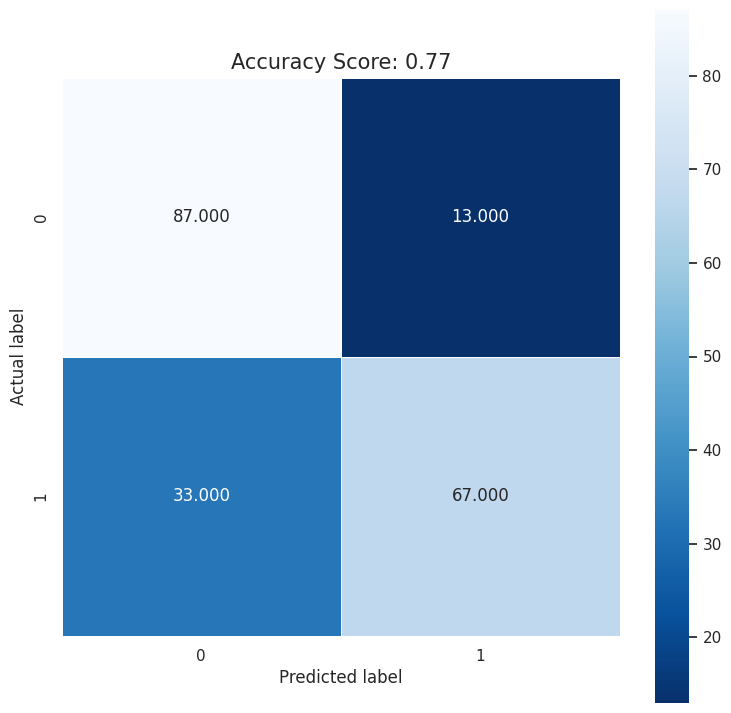

In [120]:
visualizing_confusion_matrix_using_heatmap(best_model)

# naive_bayes

In [121]:
tfpipe = Pipeline([
    ('tfidf', text_learn.TfidfVectorizer()),
    ('naive_bayes ', naive_bayes.BernoulliNB())
])

#model_grid = GridSearchCV(tfpipe, param_grid)
model_fit = tfpipe.fit(df_train.processed_sentence, df_train.Sentiment)

Accuracy: 0.755
F1 score: 0.7546995068959476
Recall: 0.755
Precision: 0.7562556526982211
Jaccard_ Score:  0.606425702811245

 confusion matrix:
 [[72 28]
 [21 79]]

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       100
           1       0.74      0.79      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



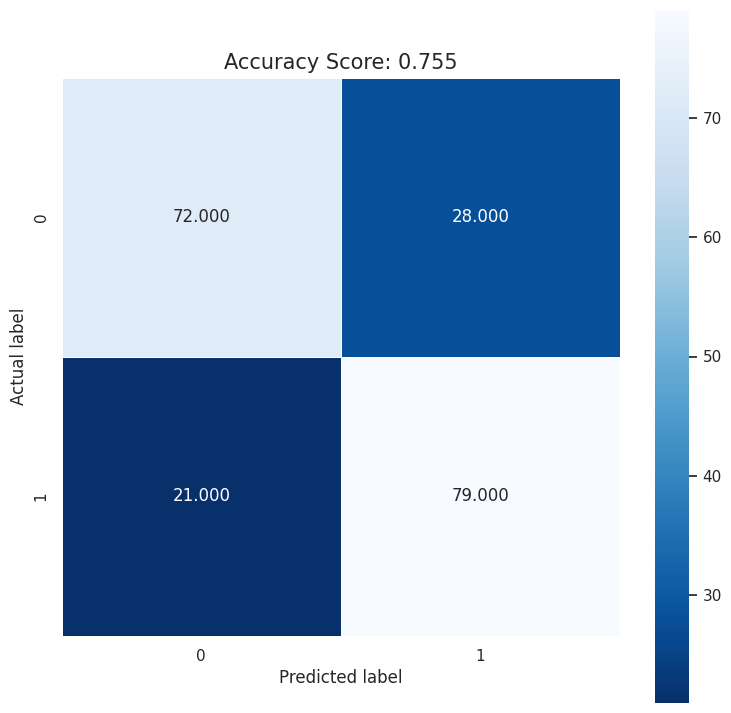

In [122]:
visualizing_confusion_matrix_using_heatmap(model_fit)

In [123]:
from sklearn.svm import SVC, LinearSVC
pipeline_svm = Pipeline([
    ('bow', text_learn.CountVectorizer()),
    ('tfidf', text_learn.TfidfTransformer()),
    ('classifier', SVC()),])


# pipeline parameters to automatically explore and tune
param_svm = [
  {'classifier__C': [1, 10, 100, 1000], 'classifier__kernel': ['linear']},
  {'classifier__C': [1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.0001], 'classifier__kernel': ['rbf']},
]

grid_svm = GridSearchCV(
    pipeline_svm,
    param_grid=param_svm,
    refit=True,
    n_jobs=-1,
    scoring='accuracy')

In [124]:
#model_grid = GridSearchCV(tfpipe, param_grid)
model_fit = grid_svm.fit(df_train.processed_sentence, df_train.Sentiment)

Accuracy: 0.78
F1 score: 0.7792051384985951
Recall: 0.78
Precision: 0.7840909090909091
Jaccard_ Score:  0.639344262295082

 confusion matrix:
 [[84 16]
 [28 72]]

 clasification report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       100
           1       0.82      0.72      0.77       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



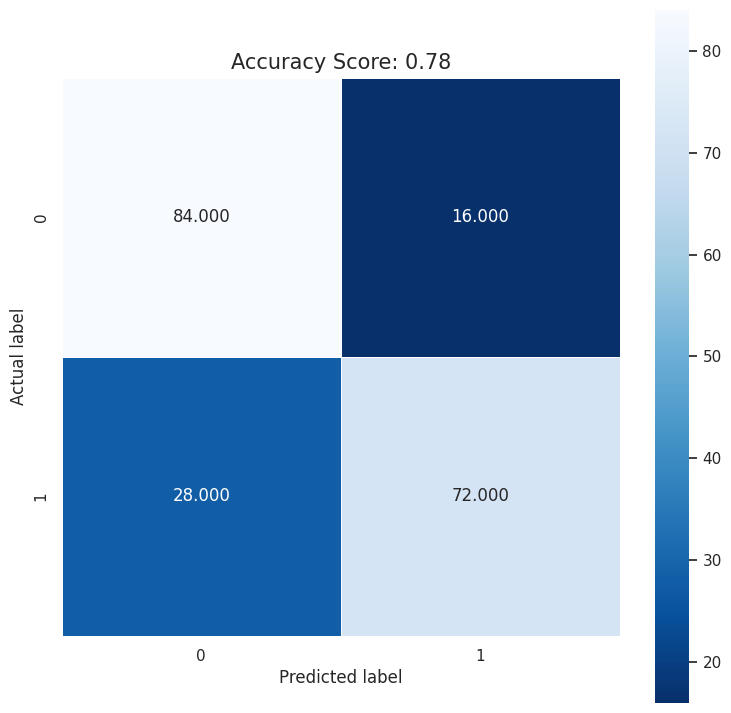

In [125]:
visualizing_confusion_matrix_using_heatmap(model_fit)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipeline_rfc = Pipeline([
    ('bow', text_learn.CountVectorizer()),
    ('tfidf', text_learn.TfidfTransformer()),
    ('classifier', RandomForestClassifier(class_weight="balanced",random_state=101)),])

In [127]:
model_fit = pipeline_rfc.fit(df_train.processed_sentence, df_train.Sentiment)

Accuracy: 0.75
F1 score: 0.7469379491851401
Recall: 0.75
Precision: 0.7627154266498528
Jaccard_ Score:  0.6

 confusion matrix:
 [[86 14]
 [36 64]]

 clasification report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77       100
           1       0.82      0.64      0.72       100

    accuracy                           0.75       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200



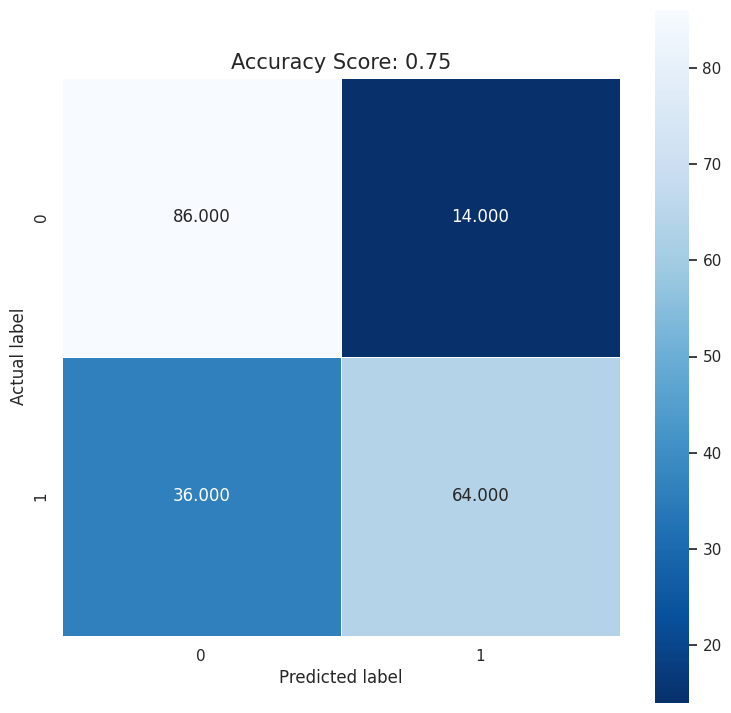

In [128]:
visualizing_confusion_matrix_using_heatmap(model_fit)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
pipeline_gbc = Pipeline([
    ('tfidf', text_learn.TfidfVectorizer()),
    ('gbclassifier ', GradientBoostingClassifier())
])

In [130]:
model_fit = pipeline_gbc.fit(df_train.processed_sentence, df_train.Sentiment)

Accuracy: 0.735
F1 score: 0.7307936507936509
Recall: 0.735
Precision: 0.7506666666666666
Jaccard_ Score:  0.5810276679841897

 confusion matrix:
 [[86 14]
 [39 61]]

 clasification report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.76       100
           1       0.81      0.61      0.70       100

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.73      0.73       200



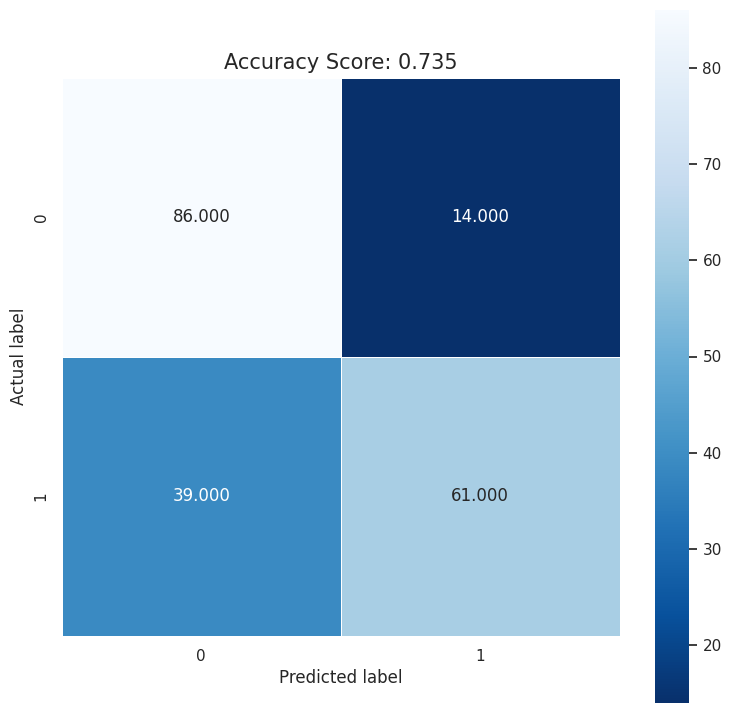

In [131]:
visualizing_confusion_matrix_using_heatmap(model_fit)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_dtc = Pipeline([
    ('tfidf', text_learn.TfidfVectorizer()),
    ('dtclassifier ', KNeighborsClassifier())
])

In [133]:
model_fit = pipeline_dtc.fit(df_train.processed_sentence, df_train.Sentiment)

Accuracy: 0.715
F1 score: 0.7133878064110623
Recall: 0.715
Precision: 0.7199488491048593
Jaccard_ Score:  0.556420233463035

 confusion matrix:
 [[79 21]
 [36 64]]

 clasification report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73       100
           1       0.75      0.64      0.69       100

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



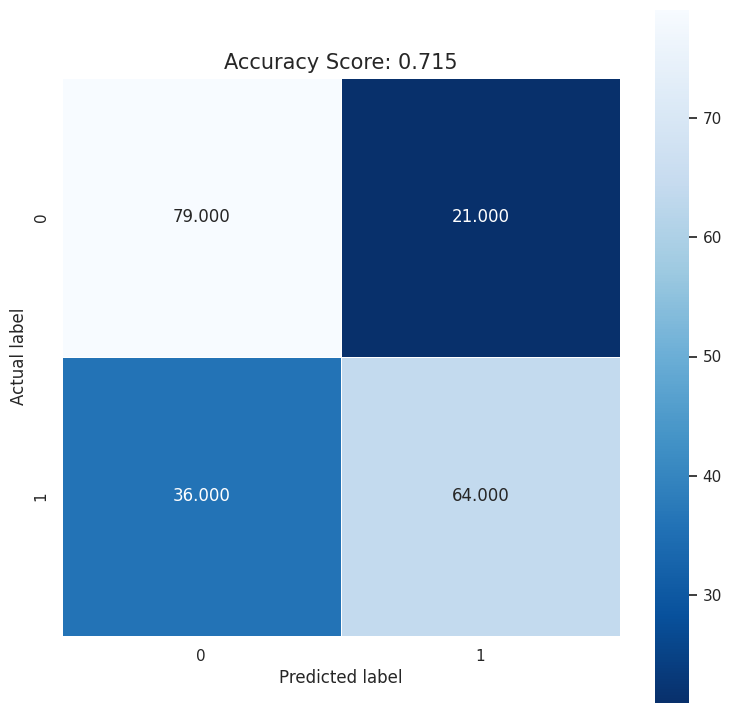

In [134]:
visualizing_confusion_matrix_using_heatmap(model_fit)

## 3. [10%] Perform classification using a BERT-based model with fine-tuning and compare the results with the 3 algorithms from Task 2

In [135]:
# A TensorFlow library of text related ops, modules, and subgraphs. The library can perform the preprocessing regularly required by text-based models
!pip install -U "tensorflow-text==2.13.*"

In [136]:
# To build transformer-based models for common NLP tasks
!pip install "tf-models-official==2.13.*"

In [137]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [138]:
from sklearn.model_selection import train_test_split

#split and take the test set
X, X_test, y, y_test = (train_test_split(df['processed_sentence'], df['Sentiment'],
                                                     stratify=df['Sentiment'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))


In [139]:
#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))

In [140]:
X_train

,processed_sentence
370,convenient since staying mgm
573,seriously killer hot chai latte
112,busy know
10,back
342,definitely come back
...,...
38,place lot promise fails deliver
473,food tasty say real traditional hunan style
101,tried cape cod ravoli chicken cranberry mmmm
759,waited hour breakfast could done time better home


In [141]:
X_val

,processed_sentence
492,fantastic food
769,spicy enough perfect actually
238,also decided send back waitress looked like verge heart attack
581,eew location need complete overhaul
77,food way overpriced portion fucking small
...,...
572,worth driving tucson
895,say food amazing
535,sad little vegetable overcooked
753,checked place couple year ago impressed


In [142]:
X_test

,processed_sentence
327,always great time do gringo
604,best breakfast buffet
634,owner really really need quit soooooo cheap let wrap freaking sandwich two paper one
451,love place hit spot want something healthy lacking quantity flavor
308,many word say place everything pretty well
...,...
750,got home see driest damn wing ever
629,service fair best
282,guess known place would suck inside excalibur use common sense
651,service beyond bad


In [143]:
#Here, we have used a Small BERT (with fewer parameters) since they are faster to fine-tune. If you like a small model but with higher accuracy,
#ALBERT might be your next option. If you want even better accuracy, choose one of the classic BERT sizes or their recent refinements like
#Electra, Talking Heads, or a BERT Expert.


bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


The preprocessing model

Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT. TensorFlow Hub provides a matching preprocessing model for each of the BERT models discussed above, which implements this transformation using TF ops from the TF.text library. It is not necessary to run pure Python code outside your TensorFlow model to preprocess text.

The preprocessing model must be the one referenced by the documentation of the BERT model.

Note: You will load the preprocessing model into a hub.KerasLayer to compose your fine-tuned model. This is the preferred API to load a TF2-style SavedModel from TF Hub into a Keras model.

In [144]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [145]:
df['processed_sentence'][0]

'gyro basically lettuce'

Let's try the preprocessing model on sample text and see the output:

In [146]:
text_test = ['my gyro wa basically lettuce only']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [  101  2026  1043 12541  2080 11333 10468  2292  8525  3401  2069   102]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


As you can see, now you have the 3 outputs from the preprocessing that a BERT model would use (input_words_id, input_mask and input_type_ids).

Some other important points:

The input is truncated to 128 tokens.
The input_type_ids only have one value (0) because this is a single sentence input. For a multiple sentence input, it would have one number for each input.
Since this text preprocessor is a TensorFlow model, It can be included in your model directly.

In [147]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [148]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.9518399   0.966696    0.15258561 -0.18472606  0.38078728  0.97658235
  0.99069035 -0.9931682  -0.33252463 -0.9999787   0.15772119 -0.99324596]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[ 0.63751954 -0.01340707  0.5104347  ... -0.77390087  0.8915624
   0.17218783]
 [ 0.87741023  0.23787308  0.9811949  ... -0.6678999  -0.49520877
  -0.2681098 ]
 [ 0.58428085  0.2533176  -0.7403995  ... -1.5406215   1.3488173
  -0.09126271]
 ...
 [ 0.6716605   0.6627659  -0.1295652  ... -1.3964012   0.55831105
   0.2122679 ]
 [-0.65251684  0.42948756  0.11068624 ... -1.0430562   1.2358495
   0.43123326]
 [ 1.0039504  -0.8823181   0.7814884  ... -1.3011031   0.55876046
  -0.27992618]]


Defining model

We have created a very simple fine-tuned model, with the preprocessing model, the selected BERT model, one Dense and a Dropout layer.

In [149]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

For the fine-tuning I have used thepooled_output array which represents each input sequence as a whole. The shape is [batch_size, H].

In [150]:
classifier_model = build_classifier_model()

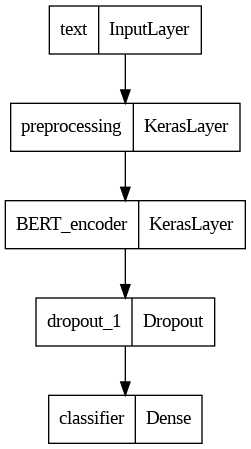

In [151]:
tf.keras.utils.plot_model(classifier_model)

Loss function¶
Since this is a binary classification problem and the model outputs a probability (a single-unit layer), we'll use losses.BinaryCrossentropy loss function.

In [152]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

Optimizer

For fine-tuning, let's use the same optimizer that BERT was originally trained with: the "Adaptive Moments" (Adam). This optimizer minimizes the prediction loss and does regularization by weight decay (not using moments), which is also known as AdamW.

In [153]:
epochs = 6
steps_per_epoch = 1200  #corresponding to the train set size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps) #10% of num_train_steps

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

Next we compile the model with the loss, metric and optimizer.

In [154]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                            

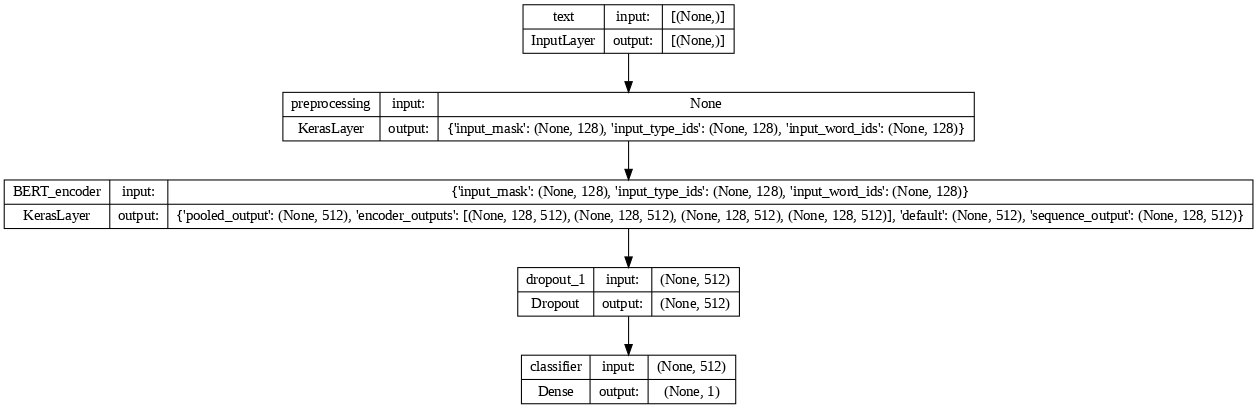

In [155]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [156]:
print(f'Training model with {tfhub_handle_encoder}')

history = classifier_model.fit(X_train,
                               y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/6
19/19 [==============================] - 229s 10s/step - loss: 0.8296 - binary_accuracy: 0.4967 - val_loss: 0.7866 - val_binary_accuracy: 0.5000
Epoch 2/6
19/19 [==============================] - 181s 10s/step - loss: 0.7788 - binary_accuracy: 0.4983 - val_loss: 0.7451 - val_binary_accuracy: 0.4950
Epoch 3/6
19/19 [==============================] - 181s 10s/step - loss: 0.7395 - binary_accuracy: 0.5000 - val_loss: 0.7130 - val_binary_accuracy: 0.5050
Epoch 4/6
19/19 [==============================] - 188s 10s/step - loss: 0.7109 - binary_accuracy: 0.4900 - val_loss: 0.6900 - val_binary_accuracy: 0.5150
Epoch 5/6
19/19 [==============================] - 181s 10s/step - loss: 0.6828 - binary_accuracy: 0.5367 - val_loss: 0.6681 - val_binary_accuracy: 0.5650
Epoch 6/6
19/19 [==============================] - 179s 9s/step - loss: 0.6555 - binary_accuracy: 0.5767 - val_loss: 0.6459 - val_bin

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


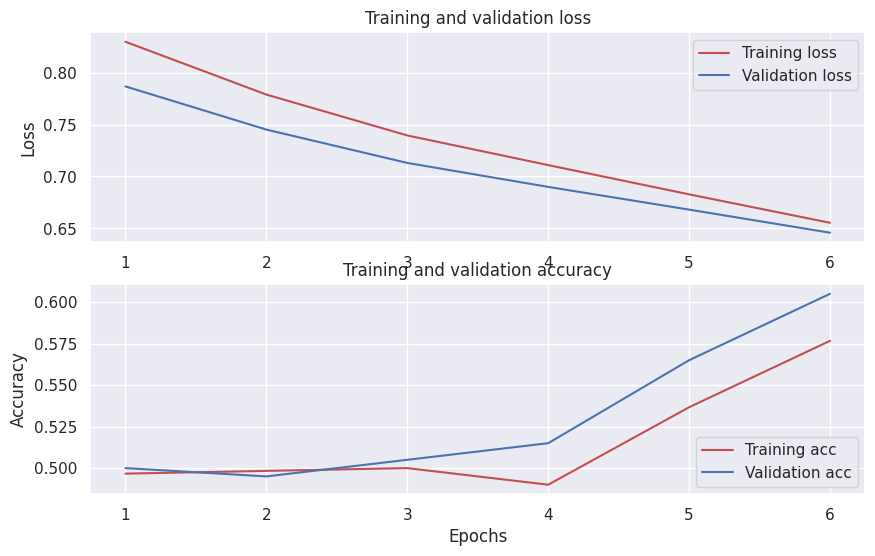

In [157]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Evaluate the model

Let's see how the model performs. Two values will be returned. Loss (a number which represents the error, lower values are better), and accuracy.

In [158]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

7/7 [==============================] - 15s 2s/step - loss: 0.6378 - binary_accuracy: 0.6200
Loss: 0.6378467082977295
Accuracy: 0.6200000047683716


In [159]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#predicted values using the model
y_pred=classifier_model.predict(X_test)

print(y_pred.flatten())

7/7 [==============================] - 16s 2s/step
[-0.2297247   1.2274486  -0.0922675   0.44895634 -0.1722767   0.43002787
  0.0474523   0.72170526 -0.6830577   0.64744914 -0.25380936 -0.12114479
 -0.24057707 -0.31033203  0.04662672 -0.28497764 -0.42103055 -0.26534477
 -0.13645107  0.17806736  0.55574346  0.38880002 -0.3592219   0.49437445
  0.29113758  0.32177836 -0.5819154   0.35555458  0.32089904  0.16030507
 -0.22202009 -1.0598812  -0.04822309 -0.2751191  -0.1351917   0.31523117
 -0.1208116   0.10653177 -0.10672143  0.1201044   0.22659683  0.44960815
 -0.08711833 -0.1150637   0.33143443  0.13795495 -0.6121258   0.9374709
  0.72009355 -0.21197808  0.11846085 -0.905907    1.3403966   0.3441244
  0.18081975  0.10786614 -0.05449667 -1.0556331   0.11970344 -0.1673142
 -0.44205633  0.55013984  0.0936494   0.7739809  -0.36018077  0.13731082
  0.33267924  0.34332976  0.28515372 -0.38786492 -0.38719288 -0.1884937
 -0.56952834 -0.48458037  0.13684458  0.11804777 -0.03145367 -0.04891413
  0.

In [160]:
#len(y_pred)

for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i] = 0
  else: y_pred[i] = 1

print(y_pred.flatten())

[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]


In [161]:
import numpy as np
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[97  3]
 [73 27]] 

Mean Absolute Error: 0.38
Mean Squared Error: 0.38
Root Mean Squared Error: 0.6164414002968976 

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       100
           1       0.90      0.27      0.42       100

    accuracy                           0.62       200
   macro avg       0.74      0.62      0.57       200
weighted avg       0.74      0.62      0.57       200

Accuracy: 0.62
AUC: 0.62


Saving Model

In [162]:
dataset_name = 'yelp_review'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [163]:
# Reloading saved model

reloaded_model = tf.saved_model.load(saved_model_path)

4.  [30%] Perform topic detection using 1 algorithm; present and discuss each topic, and assess the quality of the detected topics.

Topic identification, simply put, is a sub-field under natural language processing. It involves the process of automatically discovering and organizing the main themes or topics present in a collection of textual data.

Ref: https://www.analyticsvidhya.com/blog/2022/02/topic-identification-with-gensim-library-using-python/

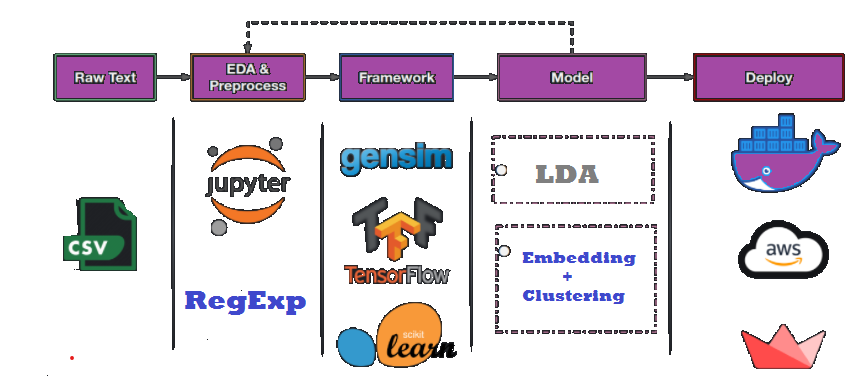

In [164]:
df.head()

,ReviewText,Sentiment,processed_sentence
0,My gyro was basically lettuce only.,0,gyro basically lettuce
1,It kept getting worse and worse so now I'm officially done.,0,kept getting worse worse officially done
2,I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.,0,far sushi connoisseur definitely tell difference good food bad food certainly bad food
3,"The staff are great, the ambiance is great.",1,staff great ambiance great
4,By this time our side of the restaurant was almost empty so there was no excuse.,0,time side restaurant almost empty excuse


In [165]:
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.utils import simple_preprocess

In [166]:
processed_sentences = df.processed_sentence.values.tolist()

In [167]:
processed_sentences

['gyro basically lettuce',
 'kept getting worse worse officially done',
 'far sushi connoisseur definitely tell difference good food bad food certainly bad food',
 'staff great ambiance great',
 'time side restaurant almost empty excuse',
 'disappointing experience',
 'restaurant atmosphere exquisite',
 'server negligent need made u feel unwelcome would suggest place',
 'considering two u left full happy cannot go wrong',
 'side greek salad greek dressing tasty pita hummus refreshing',
 'back',
 'husband ate lunch disappointed food service',
 'gotten much better service pizza place next door service received restaurant',
 'pretty good beer selection',
 'ambiance much better',
 'management rude',
 'one better buffet',
 'honeslty taste fresh',
 'miss wish one philadelphia',
 'pancake also really good pretty large',
 'going since every meal awesome',
 'great pork sandwich',
 'really enjoyed crema café expanded even told friend best breakfast',
 'cannot say enough good thing place',
 'orde

In [168]:
# gensim.utils.simple_preprocess
# Convert a document into a list of tokens.It makes tokenizing, normalizing, and cleaning text easier by completing standard pre-processing
# procedures like converting text to lowercase, eliminating punctuation, and splitting text into individual words.

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

words = list(sent_to_words(processed_sentences))

In [169]:
print(words[:1][0][:30])

['gyro', 'basically', 'lettuce']


In [170]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(words)

# Create Corpus
texts = words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [171]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[(0,
  '0.039*"place" + 0.013*"really" + 0.011*"service" + 0.011*"ever" + '
  '0.011*"good" + 0.010*"like" + 0.010*"chicken" + 0.009*"sushi" + '
  '0.007*"back" + 0.007*"would"'),
 (1,
  '0.025*"great" + 0.021*"service" + 0.020*"place" + 0.015*"food" + '
  '0.010*"back" + 0.009*"go" + 0.007*"good" + 0.007*"one" + 0.007*"get" + '
  '0.007*"time"'),
 (2,
  '0.022*"place" + 0.019*"great" + 0.018*"food" + 0.008*"would" + 0.008*"eat" '
  '+ 0.008*"got" + 0.008*"never" + 0.008*"service" + 0.007*"minute" + '
  '0.007*"came"'),
 (3,
  '0.015*"experience" + 0.014*"good" + 0.013*"like" + 0.009*"great" + '
  '0.009*"go" + 0.008*"service" + 0.008*"burger" + 0.008*"absolutely" + '
  '0.008*"food" + 0.006*"one"'),
 (4,
  '0.040*"food" + 0.016*"service" + 0.012*"place" + 0.010*"would" + '
  '0.010*"good" + 0.009*"like" + 0.009*"great" + 0.009*"bad" + 0.009*"love" + '
  '0.008*"one"'),
 (5,
  '0.028*"food" + 0.022*"good" + 0.015*"place" + 0.010*"time" + '
  '0.007*"quality" + 0.007*"wait" + 0.006*"sel

In [172]:
!pip install pyldavis

In [173]:
#pyLDAvis: The primary library for interactive topic model visualization.
#pyLDAvis.gensim_models: Provides functions to prepare LDA models (created with Gensim) for visualization with pyLDAvis

import pyLDAvis.gensim_models
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.017302 -0.009894       1        1  12.231652
6      0.017939  0.087892       2        1  11.158553
7     -0.006316 -0.062356       3        1  10.624447
2      0.036552 -0.037508       4        1  10.564491
0      0.024618  0.057802       5        1   9.887213
9      0.067718  0.069698       6        1   9.642862
8     -0.145664  0.021952       7        1   9.435698
5      0.015473 -0.116187       8        1   9.272894
3     -0.081493  0.007105       9        1   8.895779
1      0.053869 -0.018504      10        1   8.286412, topic_info=           Term       Freq      Total Category  logprob  loglift
35        place  84.000000  84.000000  Default  30.0000  30.0000
19        great  53.000000  53.000000  Default  29.0000  29.0000
15         good  72.000000  72.000000  Default  28.0000  28.0000
14         food  97.000000  97.000000  Default  27.0000  27.0000
28   experience  15.000000  15.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
15         good   3.127488  72.012753  Topic10  -4.9783  -0.6461
84       really   2.364535  27.940644  Topic10  -5.2579   0.0211
306   fantastic   1.601959   9.992120  Topic10  -5.6473   0.6600
146       first   1.601877  13.526296  Topic10  -5.6473   0.3571
69       pretty   1.601870  15.924189  Topic10  -5.6473   0.1939

[747 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
389       1  0.148153    absolutely
389       2  0.148153    absolutely
389       3  0.148153    absolutely
389       9  0.592612    absolutely
614       2  0.852155  acknowledged
...     ...       ...           ...
721       7  0.534715         yummy
721       9  0.267358         yummy
891       2  0.220490          zero
891       6  0.440981          zero
891       7  0.220490          zero

[1466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 8, 3, 1, 10, 9, 6, 4, 2])

The pyLDAvis visualization provides an interactive way to understand the topics discovered by your LDA model. Here's a breakdown of the key elements:

Intertopic Distance Map (Left Panel): This scatterplot shows the relationship between the different topics in your model. Topics closer together are more similar, while topics farther apart are more distinct. The size of the circles represents the prevalence of each topic in the corpus.

Top Terms (Right Panel): When you select a topic in the Intertopic Distance Map, this panel updates to show the most relevant terms for that topic. This helps you understand the semantic meaning of each topic.

Relevance Metric (Slider): You can adjust the relevance metric (lambda) slider to balance the prominence of salient terms (high lambda) and overall frequency (low lambda). This can reveal different aspects of the topics.

# References
neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know
medium.com/@mandoiwanaga08/topic-modeling-visualization-f1181d82fc44
stackoverflow.com/questions/59322409/pyldavis-visualisation-does-not-align-with-generated-topics
pyldavis.readthedocs.io/en/latest/readme.html
github.com/MaartenGr/BERTopic/issues/196